# Определение возраста покупателей

Проведите исследовательский анализ данных:
Посмотрите на размер выборки.
Постройте график распределения возраста в выборке.
Напечатайте на экране 10–15 фотографий и посмотрите, как устроен датасет.
Сделайте выводы о том, как результаты исследования повлияют на обучение модели

## 1. Исследовательский анализ данных

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

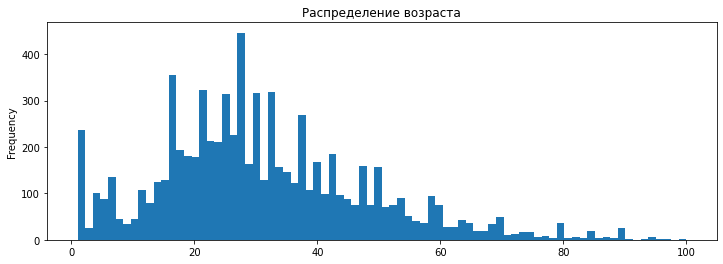

Found 7591 validated image filenames.
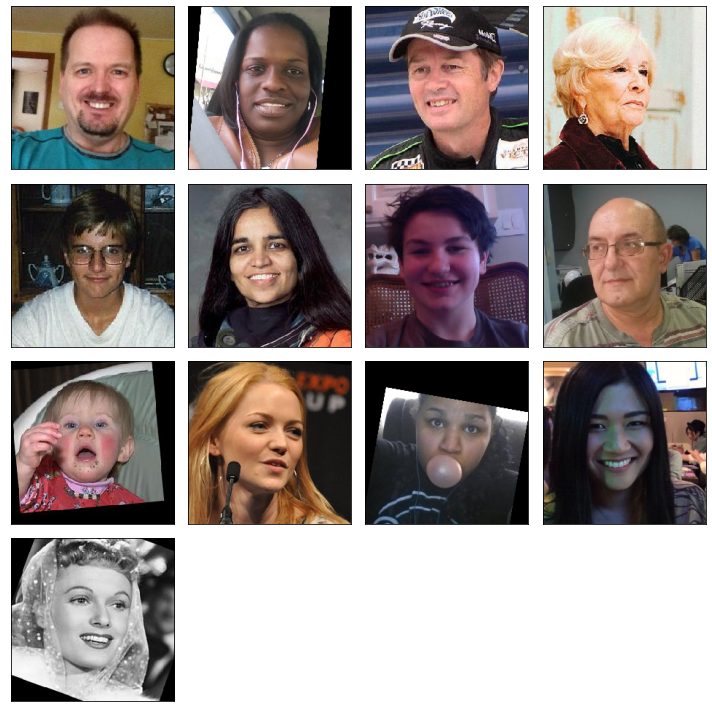


##### Вывод:
- 7591 фотографий/наблюдений в нашей выборке и основное количество приходится на возраст от 20-30
- на фотографиях присутствуют объекты, которые закрывают лицо: жвачка, очки, головной убор, другие люди.

## 2. Обучение модели

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf

def load_test(path):
    labels_test = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe = labels_test,
        directory = path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=42)

    return test_gen_flow

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=42)
    return train_gen_flow

def create_model(input_shape):

    backbone = ResNet50(
                       input_shape = input_shape,
                       weights = 'imagenet',
                       include_top = False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error',
                  metrics=['mae'])


    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=3,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

##### Вывод:
- модель сверточной нейронной сети построена на ResNet50
- за 3 эпохи обучения удалось уменьшить MAE с 10 до 5.8 на тренировочной выборке. Дальнейшее обучение возможно улучшит результат.

## 3. Анализ обученной модели

### Итоговый вывод.
Обученная модель позволяет с высокой точностью предсказывать возраст покупателей. Получение значения МАЕ: 6.8527 - хороший показатель, так как для категорий пользователей погрешность в 6 лет не так страшна. В основном по причине , что категории покупателей по возрасту разделяют по 8-12 лет.

Использование GPU и нейронных сетей позволяет быстро и эффективно обработать большое количество информации с высокой точностью.